**Neccessary packages**

In [ ]:
import torch

import copy
import numpy as np
import pandas as pd
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.optimizers import Adam


from torch import nn, optim

import torch.nn.functional as F

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

**Dataset import**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

# Load the CSV files
interactive_df = pd.read_csv('/content/drive/MyDrive/Shayema_DP_Interaction_Final/Interactive_pair_with_features_1.csv')
non_interactive_df = pd.read_csv('/content/drive/MyDrive/Datasets/D_P_Interaction/Non_Interactive_pair_with_features_20000.csv')


**Data creation**

In [ ]:
# Add the labels column
interactive_df['labels'] = 1
non_interactive_df['labels'] = 0

# Combine the dataframes
combined_df = pd.concat([interactive_df, non_interactive_df], ignore_index=True)

# Save the combined dataframe to a new CSV file
combined_df.to_csv('combined.csv', index=False)

**Drop the columns named as DrugBank_ID and  UniProt_ID and also lables**

In [ ]:
combined_df.head()

,DrugBank_ID,UniProt_ID,nA,nR,nN,nD,nC,nF,nQ,nE,...,prop5.Tr1221,prop5.Tr1331,prop5.Tr2332,prop6.Tr1221,prop6.Tr1331,prop6.Tr2332,prop7.Tr1221,prop7.Tr1331,prop7.Tr2332,labels
0,DB00006,P00734,15,1,1,1,0,0,0,4,...,0,0,0,0.198562,0.165376,0.265487,0.0,0.317478,0.0,1
1,DB00170,P00734,0,0,0,0,0,0,0,0,...,0,0,0,0.198562,0.165376,0.265487,0.0,0.317478,0.0,1
2,DB00278,P00734,2,1,0,0,0,0,0,0,...,0,0,0,0.198562,0.165376,0.265487,0.0,0.317478,0.0,1
3,DB01123,P00734,0,0,0,0,0,0,0,0,...,0,0,0,0.198562,0.165376,0.265487,0.0,0.317478,0.0,1
4,DB01593,P00734,0,0,0,0,0,0,0,0,...,0,0,0,0.198562,0.165376,0.265487,0.0,0.317478,0.0,1


In [ ]:
# Check if the column name is spelled correctly
print(combined_df.columns)

Index(['DrugBank_ID', 'UniProt_ID', 'nA', 'nR', 'nN', 'nD', 'nC', 'nF', 'nQ',
       'nE',
       ...
       'prop5.Tr1221', 'prop5.Tr1331', 'prop5.Tr2332', 'prop6.Tr1221',
       'prop6.Tr1331', 'prop6.Tr2332', 'prop7.Tr1221', 'prop7.Tr1331',
       'prop7.Tr2332', 'labels'],
      dtype='object', length=684)


In [ ]:
combined_df_1 = combined_df.drop(['DrugBank_ID','UniProt_ID'], axis=1)
combined_df_1.head()

,nA,nR,nN,nD,nC,nF,nQ,nE,nG,nH,...,prop5.Tr1221,prop5.Tr1331,prop5.Tr2332,prop6.Tr1221,prop6.Tr1331,prop6.Tr2332,prop7.Tr1221,prop7.Tr1331,prop7.Tr2332,labels
0,15,1,1,1,0,0,0,4,20,0,...,0,0,0,0.198562,0.165376,0.265487,0.0,0.317478,0.0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0.198562,0.165376,0.265487,0.0,0.317478,0.0,1
2,2,1,0,0,0,0,0,0,2,0,...,0,0,0,0.198562,0.165376,0.265487,0.0,0.317478,0.0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0.198562,0.165376,0.265487,0.0,0.317478,0.0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0.198562,0.165376,0.265487,0.0,0.317478,0.0,1


In [ ]:
label = combined_df_1['labels']
data = combined_df_1.drop(['labels'], axis=1)

data.head()

,nA,nR,nN,nD,nC,nF,nQ,nE,nG,nH,...,prop4.Tr2332,prop5.Tr1221,prop5.Tr1331,prop5.Tr2332,prop6.Tr1221,prop6.Tr1331,prop6.Tr2332,prop7.Tr1221,prop7.Tr1331,prop7.Tr2332
0,15,1,1,1,0,0,0,4,20,0,...,0,0,0,0,0.198562,0.165376,0.265487,0.0,0.317478,0.0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0.198562,0.165376,0.265487,0.0,0.317478,0.0
2,2,1,0,0,0,0,0,0,2,0,...,0,0,0,0,0.198562,0.165376,0.265487,0.0,0.317478,0.0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0.198562,0.165376,0.265487,0.0,0.317478,0.0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0.198562,0.165376,0.265487,0.0,0.317478,0.0


**Normalizing the data**

In [ ]:
import sklearn.preprocessing
scaler = sklearn.preprocessing.StandardScaler()
data1 = pd.DataFrame(scaler.fit_transform(data))

In [ ]:
data1.shape

(37335, 681)

In [ ]:
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()
label1 = pd.DataFrame(enc.fit_transform(label))

**Data Splitting**

In [ ]:
X_train,X_test, Y_train, Y_test = train_test_split(data1, label1, train_size = 0.8)

X_train,X_valid,Y_train,Y_valid = train_test_split(X_train, Y_train, train_size = 0.9)

In [ ]:
X_train = X_train.values.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test = X_test.values.reshape((X_test.shape[0], 1, X_test.shape[1]))
X_valid = X_valid.values.reshape((X_valid.shape[0], 1, X_valid.shape[1]))

In [ ]:
import keras.utils
Y_train = keras.utils.to_categorical(Y_train)
Y_test= keras.utils.to_categorical(Y_test)
Y_valid = keras.utils.to_categorical(Y_valid)

In [ ]:
X_train = X_train.reshape((X_train.shape[0], X_train.shape[2], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[2], 1))
X_valid = X_valid.reshape((X_valid.shape[0], X_valid.shape[2], 1))

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(X_valid.shape)

(26881, 681, 1)
(7467, 681, 1)
(2987, 681, 1)


In [ ]:
print(Y_train.shape)
print(Y_test.shape)
print(Y_valid.shape)

(26881, 2)
(7467, 2)
(2987, 2)


**Model building**

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Conv1D, MaxPooling1D, Flatten
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split

model = Sequential()

# First 1D convolutional layer
model.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(MaxPooling1D(pool_size=2))

# Second 1D convolutional layer
model.add(Conv1D(filters=128, kernel_size=2, activation='relu'))
model.add(MaxPooling1D(pool_size=2))

# LSTM layer
model.add(LSTM(128, return_sequences=True))
model.add(Dropout(0.5))  # Dropout for regularization

# Flatten the output
model.add(Flatten())

# Fully connected layer
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))  # Dropout for regularization

# Output layer (assuming a binary classification task)
model.add(Dense(2, activation='sigmoid'))



In [ ]:
import tensorflow as tf
# Compile the model
optimizer = Adam(learning_rate=0.0001)
model.compile(loss=tf.keras.losses.MeanSquaredError(),
                  optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                  metrics=[tf.keras.metrics.BinaryAccuracy(name='accuracy', dtype=None, threshold=0.5),
                  tf.keras.metrics.Recall(name='Recall'),
                  tf.keras.metrics.Precision(name='Precision'),
                  tf.keras.metrics.AUC( num_thresholds=200,
                                        curve="ROC",
                                        summation_method="interpolation",
                                        name="AUC",
                                        dtype=None,
                                        thresholds=None,
                                        multi_label=True,
                                       label_weights=None,)])

# Define callbacks
checkpoint_path = 'best_model.h5'
checkpoint = ModelCheckpoint(checkpoint_path, monitor='val_accuracy', save_best_only=True, mode='max', verbose=1)
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True, verbose=1)


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 680, 64)           192       
                                                                 
 max_pooling1d (MaxPooling1  (None, 340, 64)           0         
 D)                                                              
                                                                 
 conv1d_1 (Conv1D)           (None, 339, 128)          16512     
                                                                 
 max_pooling1d_1 (MaxPoolin  (None, 169, 128)          0         
 g1D)                                                            
                                                                 
 lstm (LSTM)                 (None, 169, 128)          131584    
                                                                 
 dropout (Dropout)           (None, 169, 128)          0

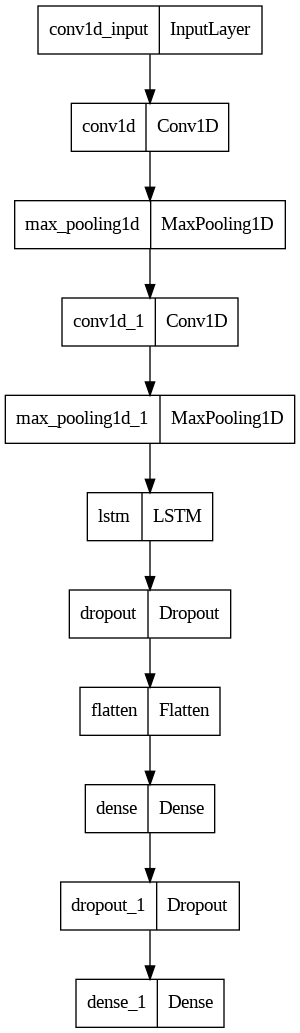

In [ ]:
import keras
from keras.utils import plot_model
plot_model(model)

In [ ]:
# Training the model
history = model.fit(X_train, Y_train, epochs=100, batch_size=16, validation_data=(X_valid, Y_valid))

Epoch 1/100
1681/1681 [==============================] - 34s 15ms/step - loss: 0.2290 - accuracy: 0.6192 - Recall: 0.6198 - Precision: 0.6191 - AUC: 0.6594 - val_loss: 0.2097 - val_accuracy: 0.6681 - val_Recall: 0.6649 - val_Precision: 0.6691 - val_AUC: 0.7340
Epoch 2/100
1681/1681 [==============================] - 24s 14ms/step - loss: 0.2062 - accuracy: 0.6669 - Recall: 0.6665 - Precision: 0.6671 - AUC: 0.7352 - val_loss: 0.1978 - val_accuracy: 0.6799 - val_Recall: 0.6793 - val_Precision: 0.6802 - val_AUC: 0.7794
Epoch 3/100
1681/1681 [==============================] - 23s 14ms/step - loss: 0.1934 - accuracy: 0.6930 - Recall: 0.6909 - Precision: 0.6938 - AUC: 0.7700 - val_loss: 0.1858 - val_accuracy: 0.7118 - val_Recall: 0.7091 - val_Precision: 0.7129 - val_AUC: 0.7979
Epoch 4/100
1681/1681 [==============================] - 24s 14ms/step - loss: 0.1836 - accuracy: 0.7157 - Recall: 0.7153 - Precision: 0.7158 - AUC: 0.7955 - val_loss: 0.1708 - val_accuracy: 0.7354 - val_Recall: 0.735

In [ ]:
predictions=model.predict([X_test])

234/234 [==============================] - 2s 5ms/step


Text(0, 0.5, 'Accuracy')

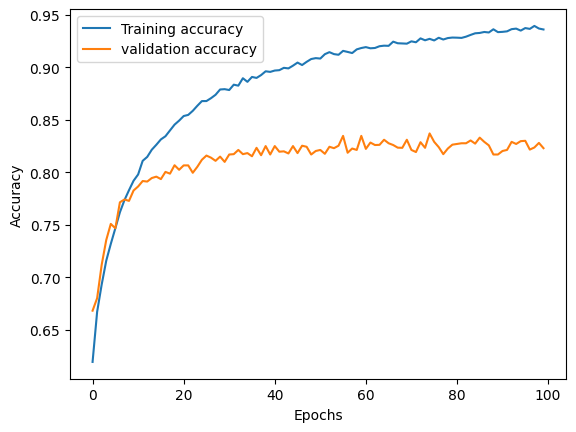

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['Training accuracy','validation accuracy'])
plt.xlabel("Epochs")
plt.ylabel("Accuracy")

Text(0, 0.5, 'Loss')

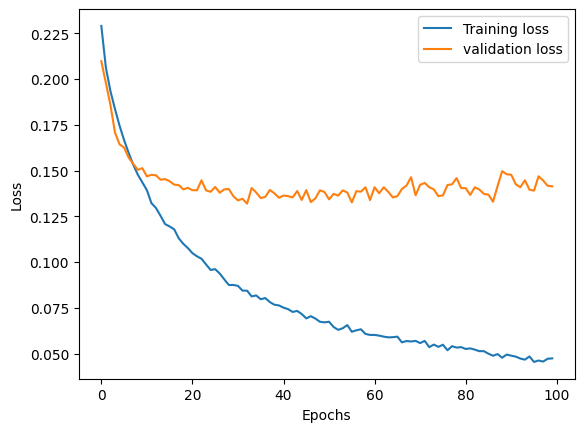

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['Training loss','validation loss'])
plt.xlabel("Epochs")
plt.ylabel("Loss")

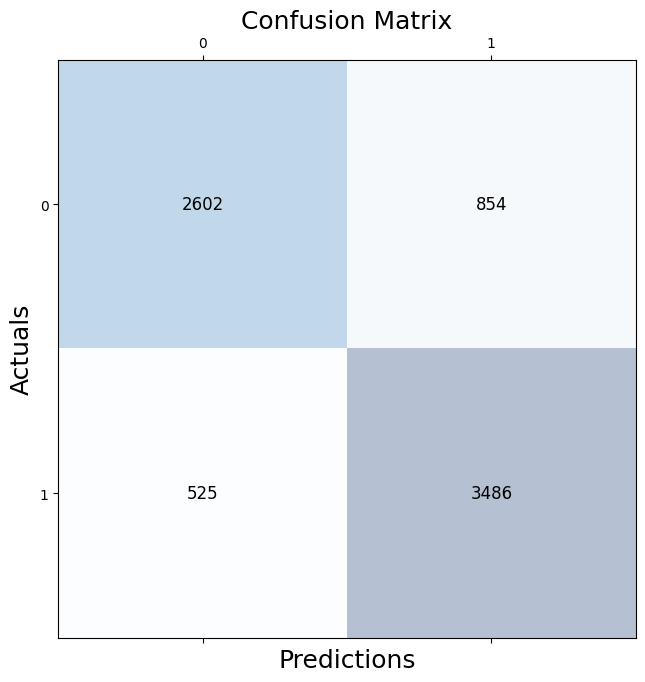

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
cm=confusion_matrix(Y_test.argmax(axis=1), predictions.argmax(axis=1 ))
fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(cm, cmap=plt.cm.Blues, alpha=0.3)
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(x=j, y=i,s=cm[i, j], va='center', ha='center', size='large')

plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [ ]:
print(classification_report(Y_test.argmax(axis=1), predictions.argmax(axis=1)))

              precision    recall  f1-score   support

           0       0.83      0.75      0.79      3456
           1       0.80      0.87      0.83      4011

    accuracy                           0.82      7467
   macro avg       0.82      0.81      0.81      7467
weighted avg       0.82      0.82      0.81      7467



In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
print('Accuracy: %3f' % accuracy_score(Y_test.argmax(axis=1), predictions.argmax(axis=1)))

Accuracy: 0.815321


In [ ]:
test_metrics = model.evaluate(X_test, Y_test, verbose=2)

test_loss = test_metrics[0]  # The first value is the loss
test_accuracy = test_metrics[1]  # The second value is the first metric (BinaryAccuracy in your case)
# Access other metrics similarly (test_metrics[2] for Recall, etc.)

print('Test Loss:', test_loss)
print('Test Accuracy:', test_accuracy)

234/234 - 1s - loss: 0.1518 - accuracy: 0.8153 - Recall: 0.8153 - Precision: 0.8153 - AUC: 0.8832 - 1s/epoch - 6ms/step
Test Loss: 0.1517515778541565
Test Accuracy: 0.8153207302093506
